In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import torch
from src.models.lbcnn.axial_lbcnn import SmallAxialUNetLBC, AxialUNetLBC
from src.models.lbcnn.axial_unet import AxialUNet, SmallAxialUNet
from src.models.lbcnn.lbc_unet import UNetLBP, SmallUNetLBP
from src.models.unet.unet_model import UNet, SmallUNet

In [2]:
def load_json_metrics(file_path):
    with open(file_path, 'r') as fp:
        metrics = json.load(fp)
    return metrics

def plot_json(json_dict, name, ax):
    ax.plot(list(json_dict.keys()), list(json_dict.values()), label=name)
    
def get_mean_metric(metric_dict, from_epoch, to_epoch=None):
    df = pd.DataFrame.from_dict(metric_dict, orient='index')
    return df[from_epoch:to_epoch].mean().item()

def get_n_params(model, verbose=False):
    pytorch_total_params = sum(p.numel() for p in model.parameters())
    if verbose:
        print('Total Params: ', pytorch_total_params)

    params = 0
    for name, param in model.named_parameters():
        if param.requires_grad:
            params += param.numel()
    if verbose:
        print('Trainable Params: ', params)
    return pytorch_total_params, params

In [3]:
metric_of_interest = 'iou'

# UNet
unet = load_json_metrics(f'/home/dsola/repos/PGA-Net/results/test_set/frosty_sponge_239_unet_ice-mean-{metric_of_interest}-epoch.json')

# Small UNet
small_unet = load_json_metrics(f'/home/dsola/repos/PGA-Net/results/test_set/laced_disco_238_small_unet_ice-mean-{metric_of_interest}-epoch.json')

# LBC UNet
lbc_unet = load_json_metrics(f'/home/dsola/repos/PGA-Net/results/test_set/worthy_wood_227_lbc_unet_ice-mean-{metric_of_interest}-epoch.json')

# Small LBC UNet
small_lbc_unet = load_json_metrics(f'/home/dsola/repos/PGA-Net/results/test_set/sandy_moon_228_small_lbc_unet_ice-mean-{metric_of_interest}-epoch.json')

# Deeplab MobileNet
deeplab_mobile_net = load_json_metrics(f'/home/dsola/repos/PGA-Net/results/test_set/vivid_donkey_305_deeplab_mobilenet_ice-mean-{metric_of_interest}-epoch.json')

# Deeplab MobileNet
lraspp_mobile_net = load_json_metrics(f'/home/dsola/repos/PGA-Net/results/test_set/clean_darkness_312_laraspp_mobilenet_ice-mean-{metric_of_interest}-epoch.json')

# DSC UNet
dsc_unet = load_json_metrics(f'/home/dsola/repos/PGA-Net/results/test_set/helpful_fire_308_unet_dsc_ice-mean-{metric_of_interest}-epoch.json')

# Small DSC UNet
small_dsc_unet = load_json_metrics(f'/home/dsola/repos/PGA-Net/results/test_set/cosmic_waterfall_315_small_dsc_unet_ice-mean-{metric_of_interest}-epoch.json')

# DSC LBC UNet
dsc_lbc_unet = load_json_metrics(f'/home/dsola/repos/PGA-Net/results/test_set/youthful_microwave_310_lbc_dsc_unet_ice-mean-{metric_of_interest}-epoch.json')

# Small DSC LBC UNet
small_dsc_lbc_unet = load_json_metrics(f'/home/dsola/repos/PGA-Net/results/test_set/still_paper_311_small_lbc_dsc_unet_ice-mean-{metric_of_interest}-epoch.json')


metric_dicts = {
    'unet': unet, 
    'small_unet': small_unet,
    'lbc_unet': lbc_unet, 
    'small_lbc_unet': small_lbc_unet,
    'deeplab_mobile_net': deeplab_mobile_net,
    'lraspp_mobile_net': lraspp_mobile_net,
    'dsc_unet': dsc_unet,
    'small_dsc_unet': small_dsc_unet,
    'dsc_lbc_unet': dsc_lbc_unet,
    'small_dsc_lbc_unet': small_dsc_lbc_unet,
}

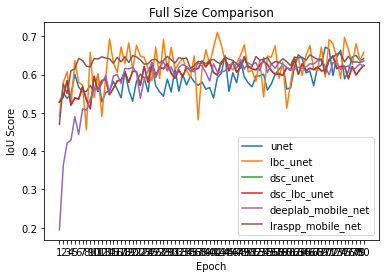

In [11]:
fig, ax = plt.subplots()

ax.set_ylabel('IoU Score')
ax.set_xlabel('Epoch')
plot_json(unet, 'unet', ax)
plot_json(lbc_unet, 'lbc_unet', ax)
plot_json(dsc_unet, 'dsc_unet', ax)
plot_json(dsc_unet, 'dsc_lbc_unet', ax)
plot_json(deeplab_mobile_net, 'deeplab_mobile_net', ax)
plot_json(lraspp_mobile_net, 'lraspp_mobile_net', ax)
plt.legend();
ax.set_title('Full Size Comparison');

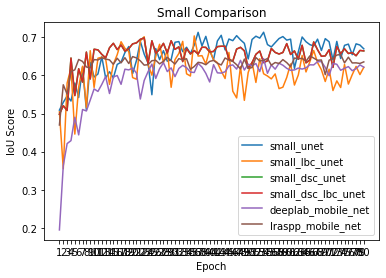

In [12]:
fig, ax = plt.subplots()

ax.set_ylabel('IoU Score')
ax.set_xlabel('Epoch')
plot_json(small_unet, 'small_unet', ax)
plot_json(small_lbc_unet, 'small_lbc_unet', ax)
plot_json(small_dsc_unet, 'small_dsc_unet', ax)
plot_json(small_dsc_unet, 'small_dsc_lbc_unet', ax)
plot_json(deeplab_mobile_net, 'deeplab_mobile_net', ax)
plot_json(lraspp_mobile_net, 'lraspp_mobile_net', ax)
plt.legend();
ax.set_title('Small Comparison');

In [4]:
FROM_EPOCH = 20
avg_metric_dict = {}
for model in metric_dicts.keys():
    avg_metric_dict[model] = get_mean_metric(metric_dicts[model], FROM_EPOCH)

In [10]:
avg_metric_dict

{'unet': 0.598656639456749,
 'small_unet': 0.6747416257858276,
 'lbc_unet': 0.6323455974459649,
 'small_lbc_unet': 0.618171152472496,
 'deeplab_mobile_net': 0.6172757844130198,
 'lraspp_mobile_net': 0.6361964911222457,
 'dsc_unet': 0.61549671292305,
 'small_dsc_unet': 0.6620068808396657,
 'dsc_lbc_unet': 0.6285201251506806,
 'small_dsc_lbc_unet': 0.6594033151865005}

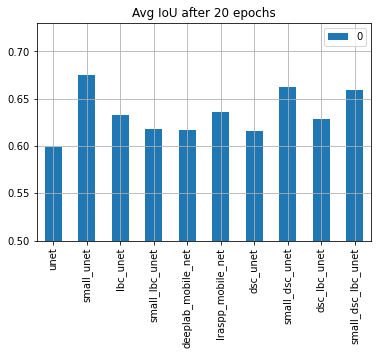

In [8]:
ax = pd.DataFrame.from_dict(avg_metric_dict, orient='index').plot.bar(ylim=(0.5, 0.73), title='Avg IoU after 20 epochs')
ax.grid();